# Softmax Regression

Softmax回归源于Logistic回归

尽管名字里带有$回归$，但它与Logistic回归同样用于分类问题

Softmax回归是一种多类分类算法，它可以解决多分类问题。


分类问题的数据表示常使用**one-hot编码（独热编码）**，即将类别标签转换为0-1向量。
例如，假设有两类分类，分别为“猫”和“狗”，则“猫”对应的one-hot编码为[1, 0]，“狗”对应的one-hot编码为[0, 1]。

SoftMax模型的数学矢量化公式：
$$ \begin{aligned} \mathbf{O} &= \mathbf{X} \mathbf{W} + \mathbf{b}, \\ \hat{\mathbf{Y}} & = \mathrm{softmax}(\mathbf{O}). \end{aligned} $$

损失函数：

$$L(\theta)=-\frac{1}{m}\sum_{i=1}^{m}\sum_{j=1}^{k}y_{ij}log\left(\frac{e^{z_{ij}}}{\sum_{l=1}^{k}e^{z_{il}}}\right)$$

其中，$y_{ij}$表示第$i$个样本的第$j$个类别的真实值，$z_{ij}$表示第$i$个样本的第$j$个类别的预测值，$m$表示样本数，$k$表示类别数。

类似于逻辑回归的损失函数，基于线性回归的最小二乘法，Softmax Regression的损失函数是对数似然函数的负值，即最大化似然函数。

softmax函数给出了一个向量$\hat{\mathbf{y}}$，
我们可以将其视为“对给定任意输入$\mathbf{x}$的每个类的条件概率”。
例如，$\hat{y}_1$=$P(y=\text{猫} \mid \mathbf{x})$。
假设整个数据集$\{\mathbf{X}, \mathbf{Y}\}$具有$n$个样本，
其中索引$i$的样本由特征向量$\mathbf{x}^{(i)}$和独热标签向量$\mathbf{y}^{(i)}$组成。
我们可以将估计值与实际值进行比较：

$$
P(\mathbf{Y} \mid \mathbf{X}) = \prod_{i=1}^n P(\mathbf{y}^{(i)} \mid \mathbf{x}^{(i)}).
$$

根据最大似然估计，我们最大化$P(\mathbf{Y} \mid \mathbf{X})$，相当于最小化负对数似然：

$$
-\log P(\mathbf{Y} \mid \mathbf{X}) = \sum_{i=1}^n -\log P(\mathbf{y}^{(i)} \mid \mathbf{x}^{(i)})
= \sum_{i=1}^n l(\mathbf{y}^{(i)}, \hat{\mathbf{y}}^{(i)}),
$$

其中，对于任何标签$\mathbf{y}$和模型预测$\hat{\mathbf{y}}$，损失函数为：

$$ l(\mathbf{y}, \hat{\mathbf{y}}) = - \sum_{j=1}^q y_j \log \hat{y}_j. $$

由于softmax和相关的损失函数很常见，
因此我们需要更好地理解它的计算方式。
利用softmax的定义，我们得到：

$$
\begin{aligned}
l(\mathbf{y}, \hat{\mathbf{y}}) &=  - \sum_{j=1}^q y_j \log \frac{\exp(o_j)}{\sum_{k=1}^q \exp(o_k)} \\
&= \sum_{j=1}^q y_j \log \sum_{k=1}^q \exp(o_k) - \sum_{j=1}^q y_j o_j\\
&= \log \sum_{k=1}^q \exp(o_k) - \sum_{j=1}^q y_j o_j.
\end{aligned}
$$

考虑相对于任何未规范化的预测$o_j$的导数，我们得到：

$$
\partial_{o_j} l(\mathbf{y}, \hat{\mathbf{y}}) = \frac{\exp(o_j)}{\sum_{k=1}^q \exp(o_k)} - y_j = \mathrm{softmax}(\mathbf{o})_j - y_j.
$$

换句话说，导数是我们softmax模型分配的概率与实际发生的情况（由独热标签向量表示）之间的差异。
从这个意义上讲，这与我们在回归中看到的非常相似，
其中梯度是观测值$y$和估计值$\hat{y}$之间的差异。
这不是巧合，在任何指数族分布模型中
对数似然的梯度正是由此得出的。
这使梯度计算在实践中变得容易很多。

上面的损失函数，我们常常称之为$交叉熵$损失函数，它是分类问题中最常用的损失函数。

想弄明白交叉熵是个什么玩意，首先从信息论的角度来理解一下$熵$的概念。

*信息论*（information theory）涉及编码、解码、发送以及尽可能简洁地处理信息或数据。信息论的主要研究对象是随机变量，而随机变量的取值可以是离散的或连续的。

*熵*（entropy）是表示随机变量不确定性的度量。熵越大，随机变量的不确定性就越大。

在信息论中，熵的单位是比特（bit）。$H(X)$表示随机变量$X$的熵，它表示随机变量的不确定性。

设$X$是一个取有限个值的离散随机变量，其概率分布为$p_i$，$i=1,2,...,n$。则随机变量$X$的熵定义为：

$$H(X)=-\sum_{i=1}^n p_i \log_2 p_i$$

其中，$\log_2$是以2为底的对数。

举个例子，假设$X$是一个抛硬币的结果，其概率分布为$p_i=0.5$，则$H(X)=1$。

再举个例子，假设$X$是一个抛骰子的结果，其概率分布为$p_i=1/6$，则$H(X)=2.58$。

由此可见，熵是衡量随机变量不确定性的一种指标。


那么什么是交叉熵呢？

我们认为H(P)是“知道真实概率的人所经历的惊异程度”，那么我们就可以把交叉熵H(P,Q)想象为“主观概率为Q的观察者在看到根据概率P生成的数据时的预期惊异”。

当P = Q的时候，交叉熵达到最低，此时H(P,P)=H(p)。

简而言之，我们可以从两方面来考虑交叉熵分类目标：<BR>
（i）最大化观测数据的似然；（ii）最小化传达标签所需的惊异。

# Realization of Softmax Regression

In [52]:
import torch
from IPython import display
from d2l import torch as d2l

In [53]:
# download some data for classification
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

In [54]:
# init params
num_inputs = 784 # 28x28 pixel images
num_outputs = 10 # 10 classes

# weight
W = torch.normal(0,0.01,size = (num_inputs,num_outputs),requires_grad = True)
# bias
b = torch.zeros(num_outputs,requires_grad=True)

In [55]:
X = torch.tensor([[1.0,2.0,3.0],[4.0,5.0,6.0]])
X.sum(0,keepdim = True),X.sum(1,keepdim = True)
# axis = 0 for column-wise sum, make the result a row vector
# axis = 1 for row-wise sum, make the result a column vector

(tensor([[5., 7., 9.]]),
 tensor([[ 6.],
         [15.]]))

**实现softmax**由三个步骤组成：

1. 对每个项求幂（使用`exp`）；
1. 对每一行求和（小批量中每个样本是一行），得到每个样本的规范化常数；
1. 将每一行除以其规范化常数，确保结果的和为1。

在查看代码之前，我们回顾一下这个表达式：


$$
\mathrm{softmax}(\mathbf{X})_{ij} = \frac{\exp(\mathbf{X}_{ij})}{\sum_k \exp(\mathbf{X}_{ik})}.
$$

分母或规范化常数，有时也称为*配分函数*（其对数称为对数-配分函数）。
该名称来自[统计物理学](https://en.wikipedia.org/wiki/Partition_function_(statistical_mechanics))中一个模拟粒子群分布的方程。


In [56]:
def softmax(X):
    """ Compute softmax values for each sets of scores in x. """
    X_exp = torch.exp(X)
    partition = X_exp.sum(1, keepdim=True)
    return X_exp / partition 

In [57]:
X = torch.normal(0,1,(2,5))
X_prob = softmax(X)
X_prob,X_prob.sum(1)

(tensor([[0.1717, 0.1294, 0.2709, 0.0342, 0.3938],
         [0.0705, 0.1866, 0.4944, 0.0500, 0.1986]]),
 tensor([1.0000, 1.0000]))

In [58]:
# define the model
def net(X):
    return softmax(torch.matmul(X.reshape((-1,W.shape[0])),W)+b)

# tips: 
#   对于X.reshape((-1, W.shape[0]))
#   -1表示自动推断维度， 即保留原有数据的数量
#   W.shape[0]表示W的第一维的长度，即特征数
#   所以X.reshape((-1,W.shape[0]))的作用是保留原有数据量，修改特征数与特征权重的数量相同

In [59]:
y = torch.tensor([0,2])
y_hat = torch.tensor([[0.1,0.3,0.6],[0.3,0.2,0.5]])
y_hat[[0,1],y]


tensor([0.1000, 0.5000])

In [60]:
# define the loss
def cross_entropy(y_hat,y):
    return - torch.log(y_hat[range(len(y_hat)),y])

cross_entropy(y_hat,y)

tensor([2.3026, 0.6931])

In [61]:
# define the accuracy function
def accuracy(y_hat,y): #@save
    """Compute the accuracy of a model"""
    if len(y_hat.shape)>1 and y_hat.shape[1]>1:
        y_hat = y_hat.argmax(axis = 1)
    cmp = y_hat.type(y.dtype) == y
    return float(cmp.type(y.dtype).sum())

In [62]:
accuracy(y_hat,y)/len(y)

0.5

In [63]:
def evaluate_accuracy(net,data_iter): #@save
    """Evaluate the accuracy of a model on the given dataset."""
    if isinstance(net,torch.nn.Module):
        net.eval() # Set the model to evaluation mode
    metric = Accumulator(2) # Accumulator for correct predictions, no. of examples
    with torch.no_grad():
        for X, y in data_iter:
            metric.add(accuracy(net(X),y),y.numel())
        return metric[0]/metric[1]

In [64]:
class Accumulator: #@save
    """在n个变量上累加"""
    def __init__(self,n):
        self.data = [0.0] * n

    def add(self, *args):
        self.data = [a + float(b) for a, b in zip(self.data, args)]

    def reset(self):
        self.data = [0.0] * len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

In [65]:
evaluate_accuracy(net,test_iter)

0.1359

In [66]:
# define the training loop  
def train_epoch(net,train_iter,loss,updater):
    """Train a model for one epoch."""

    # set the model to training mode
    if isinstance(net, torch.nn.Module):
        net.train()
    
    metric = Accumulator(3)
    
    for X,y in train_iter:
        # compute gradients and update parameters
        y_hat = net(X)
        l = loss(y_hat,y)
        if isinstance(updater,torch.optim.Optimizer):
            # use optimizer to update parameters
            updater.zero_grad()
            l.mean().backward()
            updater.step()
        else :
            # use a custom updater to update parameters
            l.sum().backward()
            updater(X.shape[0])
        metric.add(float(l.sum()), accuracy(y_hat,y), y.numel())
    
    # return training metric
    return metric[0]/metric[2], metric[1]/metric[2]

In [67]:
class Animator:
    """draw animation of training process"""
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1,
                 figsize=(3.5, 2.5)):
        # 增量地绘制多条线
        if legend is None:
            legend = []
        d2l.use_svg_display()
        self.fig, self.axes = d2l.plt.subplots(nrows, ncols, figsize=figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes, ]
        # 使用lambda函数捕获参数
        self.config_axes = lambda: d2l.set_axes(
            self.axes[0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
        self.X, self.Y, self.fmts = None, None, fmts

    def add(self, x, y):
        # 向图表中添加多个数据点
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)]
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i, (a, b) in enumerate(zip(x, y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        self.axes[0].cla()
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait=True)

In [68]:
def train(net,train_iter,test_iter,loss,num_epochs,updater):
    """train a model"""
    animator = Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.3, 0.9],
                        legend=['train loss', 'train acc', 'test acc'])
    for epoch in range(num_epochs):
        train_metrics = train_epoch(net,train_iter,loss,updater)
        test_acc = evaluate_accuracy(net,test_iter)
        animator.add(epoch +1,train_metrics + (test_acc,))
    train_loss, train_acc = train_metrics
    assert train_loss < 0.5, train_loss
    assert train_acc <=1 and train_acc > 0.7, train_acc
    assert test_acc <= 1 and test_acc > 0.7, test_acc

In [69]:
lr = 0.1
def updater(batch_size):
    return d2l.sgd([W,b],lr,batch_size)


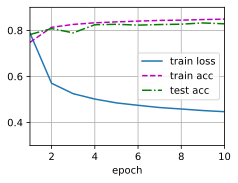

In [70]:
# params settings
num_epochs = 10
train(net,train_iter,test_iter,cross_entropy,num_epochs,updater)


# Realization of Softmax Regression with API

In [71]:
import torch
from torch import nn
from d2l import torch as d2l



In [73]:
batch_size = 256
train_iter,test_iter = d2l.load_data_fashion_mnist(batch_size)

In [74]:
# init params

net = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784, 10)
)

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight,std = 0.01)

net.apply(init_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=10, bias=True)
)

In [75]:
loss = nn.CrossEntropyLoss(reduction='none')

In [76]:
trainer = torch.optim.SGD(net.parameters(), lr=0.1)

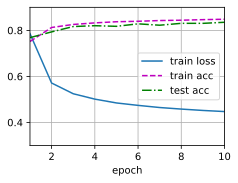

In [77]:
num_epochs = 10
train(net, train_iter, test_iter, loss, num_epochs, trainer)

最后我们来测试一下我们的模型

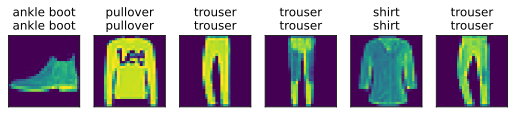

In [78]:
def predict_ch3(net, test_iter, n=6):  #@save
    """预测标签（定义见第3章）"""
    for X, y in test_iter:
        break
    trues = d2l.get_fashion_mnist_labels(y)
    preds = d2l.get_fashion_mnist_labels(net(X).argmax(axis=1))
    titles = [true +'\n' + pred for true, pred in zip(trues, preds)]
    d2l.show_images(
        X[0:n].reshape((n, 28, 28)), 1, n, titles=titles[0:n])

predict_ch3(net, test_iter)